In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [10]:
# cette ligne permet d'intégrer les graphiques au notebook
%matplotlib inline

import matplotlib.pyplot as plt

# paramètres
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["font.size"] = 20

## Lecture des données

In [11]:
# On transfert les données sur une variables datsrc + description des données

datsrc = pd.read_excel("donnees-synop-essentielles-omm.xlsx", index_col=0)
datsrc.describe()

,Variation_de_pression_en_3_heures,Type_de_tendance_barometrique,Direction _du _vent _moyen_10 mn,Vitesse_du_vent_moyen_10 mn,Point_de_rosee,Humidite,Visibilite_horizontale,Temps_present,Nebulosite_totale,Hauteur_de_la_base_des_nuages,Pression_station,Variation_de_pression_en_24_heures,Rafale_sur_les_10_dernieres_minutes,Rafales_sur_une_periode,Nebulosite_couche_nuageuse_1,Temperature
count,2531.000000,2531.000000,2531.000000,2531.000000,2531.000000,2531.000000,2531.000000,2520.000000,1390.000000,1718.000000,2531.000000,2505.000000,2505.000000,2531.000000,1705.000000,2531.000000
mean,-0.339787,4.414461,193.804820,2.775109,282.904919,76.275385,35230.849467,6.041667,97.549640,1690.064028,97613.401817,-3.305389,4.529142,5.559502,4.602346,14.425405
std,116.656158,2.713473,94.954242,1.669450,4.966389,17.151096,18062.495445,17.829868,6.036729,1714.961857,633.327311,461.820968,2.730535,3.097114,2.792973,6.775581
min,-810.000000,0.000000,0.000000,0.000000,268.750000,19.000000,50.000000,0.000000,75.000000,30.000000,94740.000000,-1970.000000,0.500000,0.800000,0.000000,-2.600000
25%,-70.000000,2.000000,150.000000,1.700000,279.350000,65.000000,19685.000000,0.000000,100.000000,450.000000,97240.000000,-290.000000,2.700000,3.400000,2.000000,9.700000
50%,0.000000,5.000000,200.000000,2.400000,283.450000,81.000000,36310.000000,0.000000,100.000000,1250.000000,97640.000000,-20.000000,3.800000,4.900000,5.000000,14.200000
75%,70.000000,7.000000,270.000000,3.400000,286.550000,90.000000,52050.000000,0.000000,100.000000,2250.000000,98000.000000,280.000000,5.600000,6.800000,7.000000,18.700000
max,890.000000,8.000000,360.000000,16.600000,295.250000,100.000000,60000.000000,71.000000,101.000000,7380.000000,99310.000000,2220.000000,29.900000,33.000000,9.000000,38.100000


## Exemple d'application

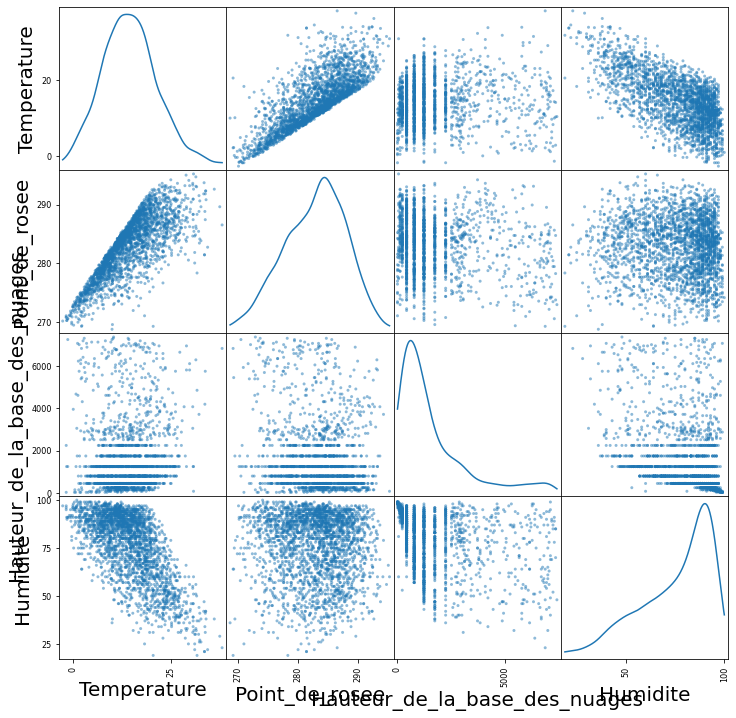

In [12]:
pd.plotting.scatter_matrix(
    datsrc[["Temperature","Point_de_rosee","Hauteur_de_la_base_des_nuages","Humidite"]], # Mettez ce que vous voulez corréler
    diagonal="kde", 
    figsize=(12, 12)
);

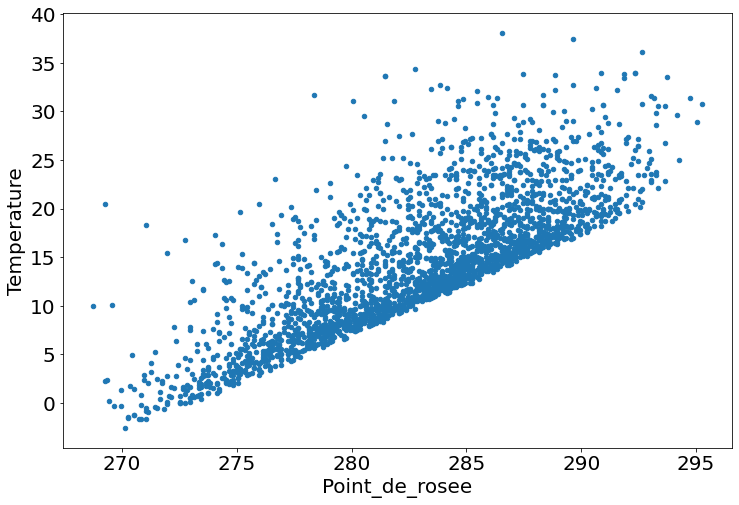

In [32]:
# tiens ce graphique à l'air intéressant, si on le regardait de plus près !

datsrc.plot.scatter(x="Point_de_rosee", y="Temperature")

Merveilleux, on voit que la température et la température sous laquelle la rosée se dépose naturellement sont corrélées,
il va falloir expliquer le phénomène :
    
    -on obtient un graphe similaire aux approximations d'August-Roche-Magnus;
    -le point de rosée correspond aussi à la température à laquelle la pression partielle
     de vapeur d'eau est égale à sa pression de vapeur saturante;
    -On peut donc calculer l'humidité grâce au point de rosée.

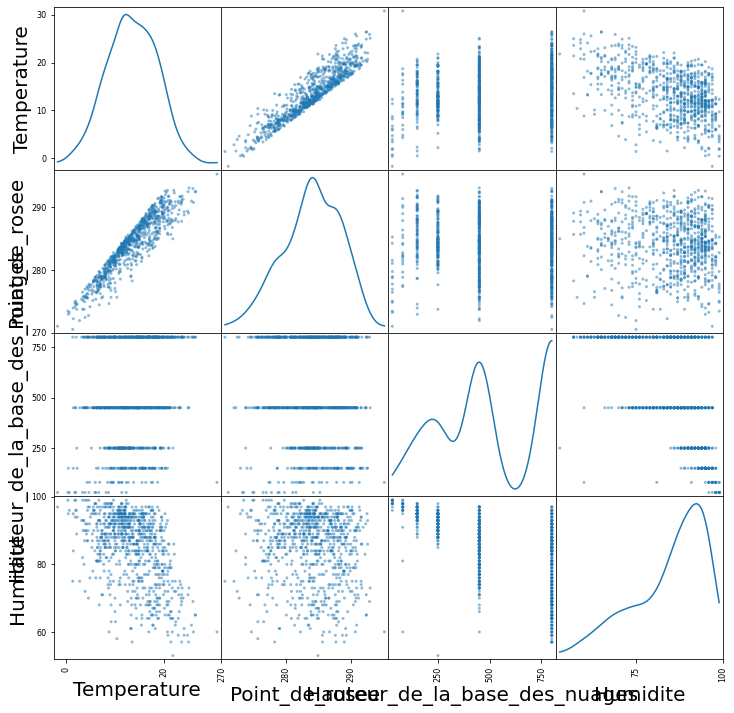

In [39]:
# Que se passe-t-il lorsqu'il y a des nuages à plus de 1000m d'altitude ?

a = datsrc[datsrc.Hauteur_de_la_base_des_nuages < 1000]

pd.plotting.scatter_matrix(
    a[["Temperature","Point_de_rosee","Hauteur_de_la_base_des_nuages","Humidite"]], 
    diagonal="kde", 
    figsize=(12, 12)
);

### A vous de jouer

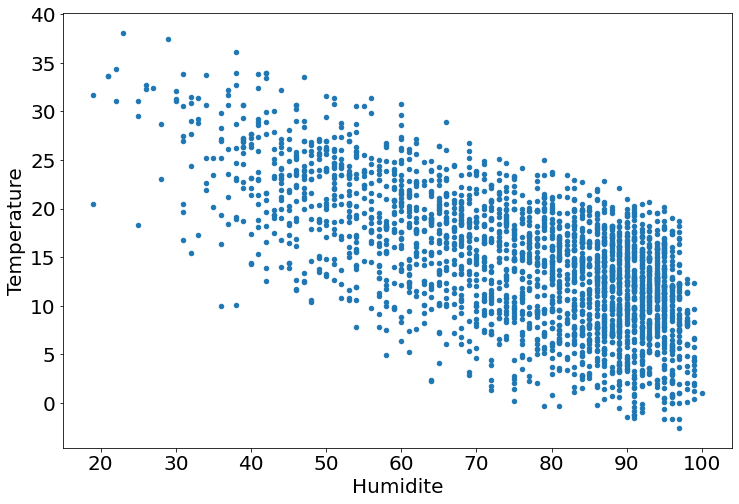

In [15]:
# tiens ce graphique à l'air intéressant, si on le regardait de plus près !

datsrc.plot.scatter(x="Humidite", y="Temperature")

Nous remarquons qu'il y a une certaine  corrélation entre la température et l'humidité,
En effet, l'humidité augmente quand la température diminue.


In [ ]:
# tiens ce graphique à l'air intéressant, si on le regardait de plus près !

datsrc.plot.scatter(x="Humidite", y="Temperature")

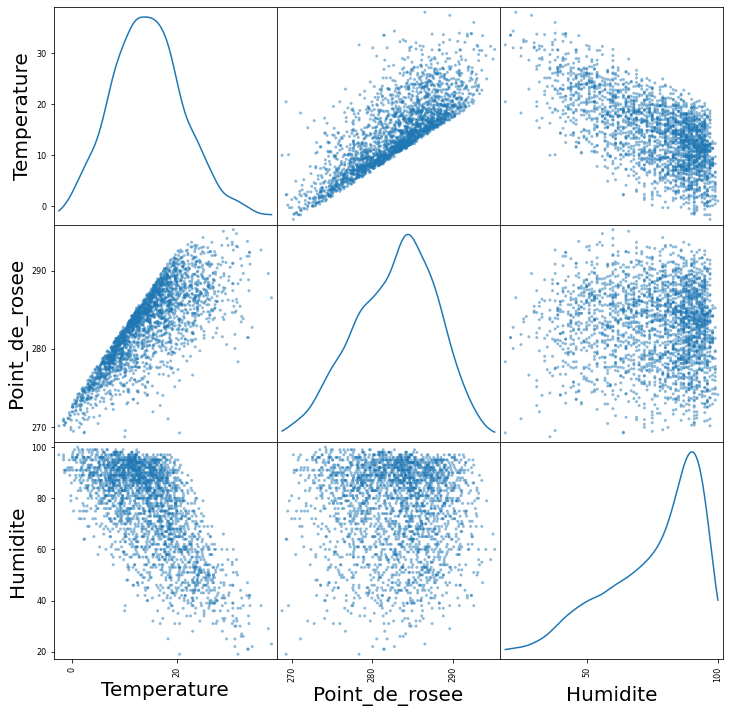

In [34]:
pd.plotting.scatter_matrix(
    datsrc[["Temperature","Point_de_rosee","Humidite"]], # Mettez ce que vous voulez corréler
    diagonal="kde", 
    figsize=(12, 12)
);

Ces graphiques peuvent être exploités car ils présentent des corrélations.
Point de rosée température et température humidité ont été analysés plus haut. Nous allons analyser, point de rosée humidité.
Avant ça regardons ce qu'on peut tirer de pression humidité et température pression :

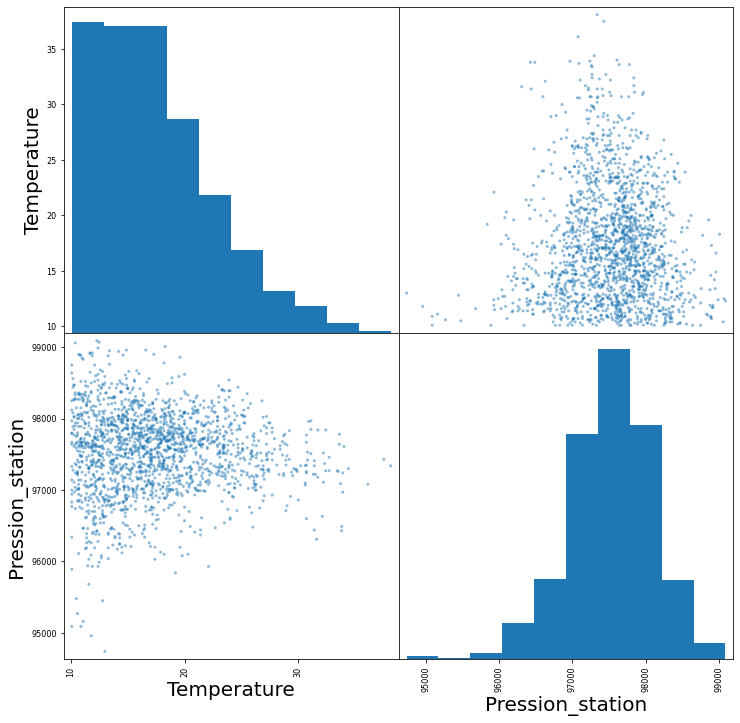

In [29]:
# Que se passe-t-il lorsqu'il y a des nuages à plus de 1000m d'altitude ?

b = datsrc[datsrc.Temperature>10]

pd.plotting.scatter_matrix(
    b[["Temperature","Pression_station"]], 
    figsize=(12, 12)
);
c = b[b.Temperature < 30]

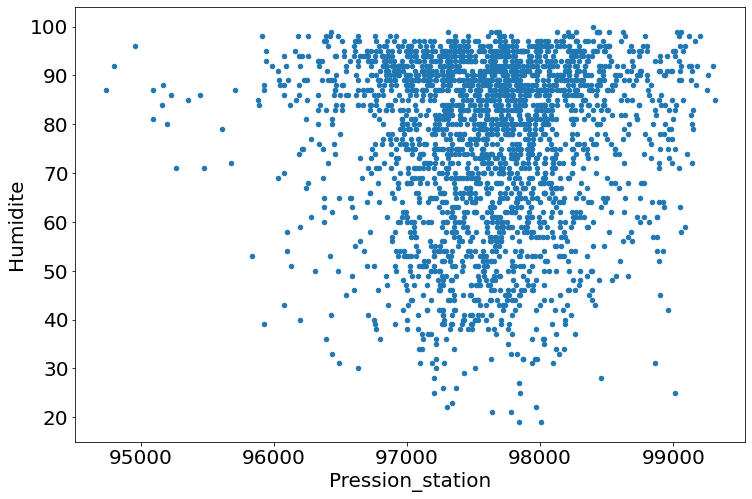

In [23]:
# tiens ce graphique à l'air intéressant, si on le regardait de plus près !

datsrc.plot.scatter(x="Pression_station", y="Humidite")

on ne peut pas trop conclure car la pression semble constante malgrès les valeurs différentes d'humidité (même conclusion pour température en fonction de le pression, voir graphique suivant)

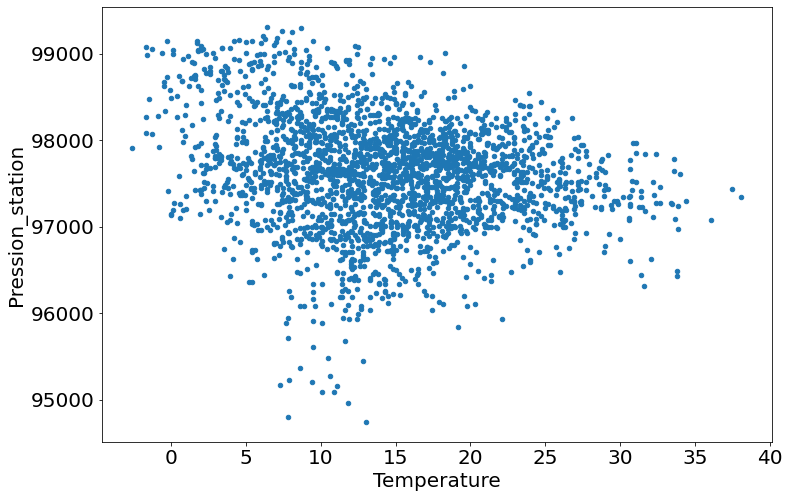

In [24]:
# tiens ce graphique à l'air intéressant, si on le regardait de plus près !

datsrc.plot.scatter(x="Temperature", y="Pression_station")

On ne peut pas trop conclure, normalement la pression augmente quand la temperature augmente.
On remarque surtout que l'on a une pression constante, qui vient surement du fait que les mesures se font toujours à la même altitude.

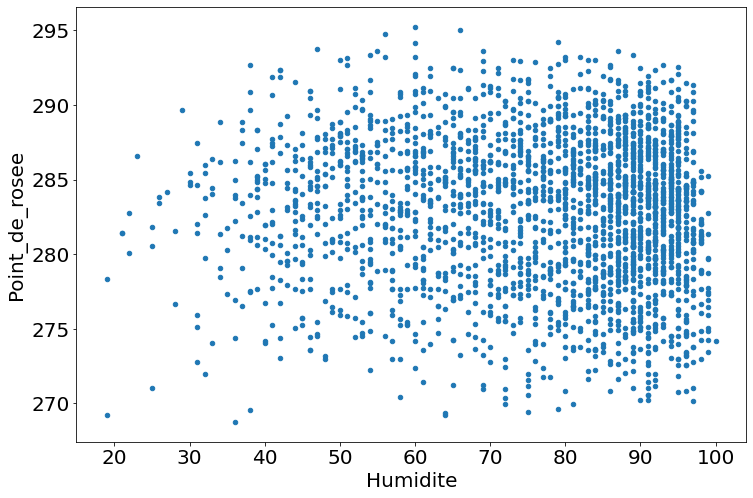

In [31]:
# tiens ce graphique à l'air intéressant, si on le regardait de plus près !

datsrc.plot.scatter(x="Nebulosite_couche_nuageuse_1", y="Point_de_rosee")

Lorsque l'humidité atteind 100% on atteind le point de rosée, 
on remarque que l'on a plus de point de rosée pour une humidité proche de 100, ça valide donc la théorie

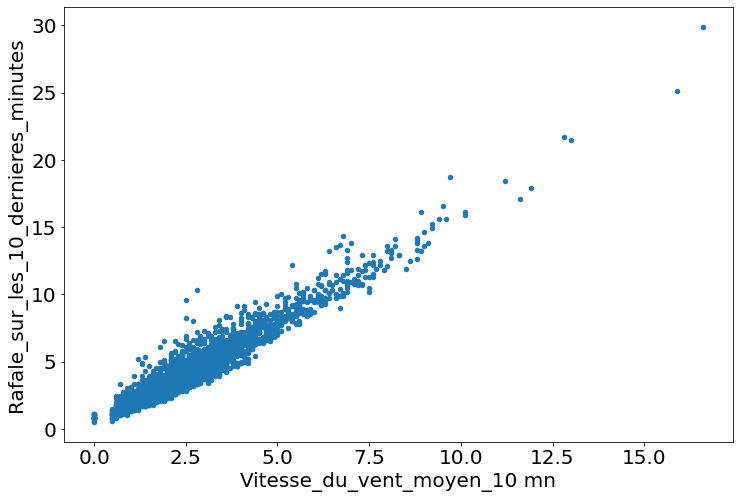

In [47]:
# tiens ce graphique à l'air intéressant, si on le regardait de plus près !

datsrc.plot.scatter(x="Vitesse_du_vent_moyen_10 mn", y="Rafale_sur_les_10_dernieres_minutes")

Il y a corrélation entre la vitesse du vent et la force des rafales.
Quand la vitesse du vent augmente, la force de la rafale augmente, c'est proportionnel et c'est logique.
Quand il n'y a pas de vent, il n'y a pas de rafale.